In [8]:
%load_ext autoreload
%autoreload 2

import  numpy               as np
import  matplotlib.pyplot   as plt
import  astropy.units       as u
from    pathlib             import Path
from    astropy.cosmology   import Planck18 as Planck
from itertools import product
plt.style.use('./configurations/style.mplstyle')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/tmp/ipykernel_17828/3665382763.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


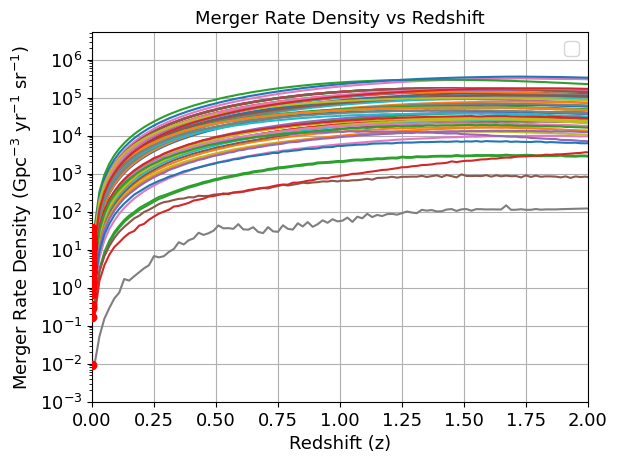

In [15]:
#pop to study 
pop         = "MRD_spread_15Z_40_No_MandF2017_0.1_No_No_0.dat"

alpha_vals = [
    "A0.5", "A1.0", "A3.0", "A5.0"
]

base_path = Path("datafiles/populations/MRD/output_sigma0.1")
all_folders = list(base_path.glob("*"))

for alpha, folder in product(alpha_vals, all_folders):
    MRD_file = folder / alpha / "BNSs" / pop
    z_c, MRD_c = np.loadtxt(MRD_file, unpack=True)
    mrd_detector_frame = MRD_c * (1 / (1 + z_c))
    mrd_vol = 4 * np.pi * Planck.differential_comoving_volume(z_c).to(u.Gpc ** 3 / u.sr).value
    mr_df_def = mrd_detector_frame * mrd_vol
    
    # take the 2 smallest redshifts, draw a line between them, the point at z = 0 is the local rate
    sorted_indices = np.argsort(z_c)
    z_c = z_c[sorted_indices]
    mr_df_def = mr_df_def[sorted_indices]
    
    # Get the local rate (z = 0)
    r_0 = mr_df_def[0]
    
    # Plot the merger rate density
    plt.plot(z_c, mr_df_def)
    plt.scatter([0], [r_0], color='red', zorder=5)
    
plt.xlabel("Redshift (z)")
plt.ylabel("Merger Rate Density (Gpc$^{-3}$ yr$^{-1}$ sr$^{-1}$)")
plt.title("Merger Rate Density vs Redshift")
plt.legend()
plt.grid()
plt.yscale('log')
plt.ylim(1e-3, None)
plt.xlim(0, 2)
plt.show()

In [20]:
import json

#pop to study 
pop = "MRD_spread_15Z_40_No_MandF2017_0.1_No_No_0.dat"

alpha_vals = [
    "A0.5", "A1.0", "A3.0", "A5.0"
]

base_path = Path("datafiles/populations/MRD/output_sigma0.1")
all_folders = list(base_path.glob("*"))

# Initialize the calculated local rates dictionary
calculated_local_rates = {}

print("Calculated Local Rates (Gpc^-3 yr^-1):")
print("=" * 60)

for alpha in alpha_vals:
    calculated_local_rates[alpha] = {}
    
    for folder in all_folders:
        MRD_file = folder / alpha / "BNSs" / pop
        if MRD_file.exists():
            z_c, MRD_c = np.loadtxt(MRD_file, unpack=True)
            mrd_detector_frame = MRD_c * (1 / (1 + z_c))
            mrd_vol = 4 * np.pi * Planck.differential_comoving_volume(z_c).to(u.Gpc ** 3 / u.sr).value
            mr_df_def = mrd_detector_frame #* mrd_vol
            
            # take the 2 smallest redshifts, draw a line between them, the point at z = 0 is the local rate
            sorted_indices  = np.argsort(z_c)
            z_c             = z_c[sorted_indices]
            mr_df_def       = mr_df_def[sorted_indices]
            
            # Get the local rate (z = 0)
            r_0 = mr_df_def[0]
            
            # Extract model name from folder
            model_name = folder.name
            
            # Store in dictionary
            calculated_local_rates[alpha][model_name] = r_0

# Print the JSON structure
print("\n" + "=" * 60)
print("Calculated Local Rates Dictionary:")
print("=" * 60)
print(json.dumps(calculated_local_rates, indent=4))

# Save to file
with open('calculated_local_rates.json', 'w') as f:
    json.dump(calculated_local_rates, f, indent=4)

Calculated Local Rates (Gpc^-3 yr^-1):

Calculated Local Rates Dictionary:
{
    "A0.5": {
        "fiducial_delayed": 23.04376191302329,
        "fiducial_fmtbse": 16.184622028702766,
        "fiducial_HGoptimistic": 3.1928265128479687,
        "fiducial_Hrad": 23.787787557373495,
        "fiducial_Hrad_5M": 24.145730335425103,
        "fiducial_kick150": 17.62380574488687,
        "fiducial_kick265": 6.335246263743912,
        "fiducial_klencki": 0.08470753088086849,
        "fiducial_l01": 13.876582781926011,
        "fiducial_notides": 20.89009203476603,
        "fiducial_notides_pericirc": 54.49796631643539,
        "fiducial_pisnfarmer19": 23.787787557373495,
        "fiducial_qcbse": 2.8012032214203346,
        "fiducial_qhe": 23.787787543356878,
        "fiducial_rad": 106.14369427859243,
        "fiducial_xuli": 2.747879127263179
    },
    "A1.0": {
        "fiducial_delayed": 109.09695160523535,
        "fiducial_fmtbse": 83.3685050907525,
        "fiducial_HGoptimistic": 32

In [17]:
#Save the samples to the data folder keeping the same format as the other populations
np.savetxt(datafolder/f"samples_{pop}", samples)

# Download and produce populations for All

In [18]:
import requests
import urllib.parse
from pathlib import Path

# Parameters
project     = "iogiul/iorio22_plot"  # Correct project identifier
branch      = "v3"
base_path   = "Merger_rate/cosmo_rate_bavera"  # Corrected case to 'Merger_rate'

# Encode project id for the API call
project_id = urllib.parse.quote(project, safe='')

# GitLab API endpoint for repository tree
api_url = f"https://gitlab.com/api/v4/projects/{project_id}/repository/tree"

# Get contents of the base directory
params = {'ref': branch, 'path': base_path, 'per_page': 2000, 'recursive': True}  # Added per_page to handle more entries
response = requests.get(api_url, params=params)
if response.status_code != 200:
    raise Exception(f"Error fetching repository tree: {response.status_code} - {response.text}")
entries = response.json()

mrd_files = []
for entry in entries:
    if entry["type"] == "tree":
        subdir = entry["path"]
        # Retrieve all pages for subdirectories with many entries
        page = 1
        while True:
            params_sub = {'ref': branch, 'path': subdir, 'per_page': 2000, 'page': page}
            sub_response = requests.get(api_url, params=params_sub)
            if sub_response.status_code != 200:
                break
            sub_entries = sub_response.json()
            if not sub_entries:
                break
            for item in sub_entries:
                if item["type"] == "blob" and item["name"].startswith("MRD"):
                    mrd_files.append(item["path"])
            page += 1
    elif entry["type"] == "blob" and entry["name"].startswith("MRD"):
        mrd_files.append(entry["path"])

print("Found MRD files:")
for f in mrd_files:
    print(f)

KeyboardInterrupt: 

In [ ]:
import requests
from pathlib import Path

# Define parameters used previously
project = "iogiul/iorio22_plot"
branch = "v3"
base_path = "Merger_rate/cosmo_rate_bavera"  # Base path used when listing files

# Folder where files will be saved:
save_dir = Path("datafiles/populations/MRD")
save_dir.mkdir(parents=True, exist_ok=True)

# Base URL for raw file download (GitLab uses the "-/raw" notation)
base_raw_url = f"https://gitlab.com/{project}/-/raw/{branch}/"

# Download and save each file from mrd_files that contains '/BNSs/' in its path.
for repo_file in mrd_files:
    if "/BNSs/" in repo_file:
        # Build the raw URL for the file
        raw_url = f"{base_raw_url}{repo_file}"
        
        response = requests.get(raw_url)
        if response.status_code == 200:
            # Optional: remove base_path from repo_file to preserve only the subfolder structure.
            try:
                relative_path = Path(repo_file).relative_to(base_path)
            except ValueError:
                relative_path = Path(repo_file)
            # Build full local file path under save_dir
            local_file = save_dir / relative_path
            local_file.parent.mkdir(parents=True, exist_ok=True)
            with open(local_file, 'wb') as f:
                f.write(response.content)
            print(f"Saved {local_file}")
        else:
            print(f"Failed to download {raw_url}: {response.status_code}")

Saved datafiles/populations/MRD/output_sigma0.1/fiducial_HGoptimistic/A0.5/BNSs/MRD_spread_15Z_40_No_MandF2017_0.1_No_No_0.dat
Saved datafiles/populations/MRD/output_sigma0.1/fiducial_HGoptimistic/A1.0/BNSs/MRD_spread_15Z_40_No_MandF2017_0.1_No_No_0.dat
Saved datafiles/populations/MRD/output_sigma0.1/fiducial_HGoptimistic/A3.0/BNSs/MRD_spread_15Z_40_No_MandF2017_0.1_No_No_0.dat
Saved datafiles/populations/MRD/output_sigma0.1/fiducial_HGoptimistic/A5.0/BNSs/MRD_spread_15Z_40_No_MandF2017_0.1_No_No_0.dat
Saved datafiles/populations/MRD/output_sigma0.1/fiducial_Hrad/A0.5/BNSs/MRD_spread_15Z_40_No_MandF2017_0.1_No_No_0.dat
Saved datafiles/populations/MRD/output_sigma0.1/fiducial_Hrad/A1.0/BNSs/MRD_spread_15Z_40_No_MandF2017_0.1_No_No_0.dat
Saved datafiles/populations/MRD/output_sigma0.1/fiducial_Hrad/A3.0/BNSs/MRD_spread_15Z_40_No_MandF2017_0.1_No_No_0.dat
Saved datafiles/populations/MRD/output_sigma0.1/fiducial_Hrad/A5.0/BNSs/MRD_spread_15Z_40_No_MandF2017_0.1_No_No_0.dat
Saved datafiles/

In [ ]:
import shutil
from pathlib import Path

# Define the source directory containing the .dat files
source_dir = Path("datafiles/populations/MRD/output_sigma0.1")
# Define the destination directory for the extracted/renamed files
dest_dir = Path("datafiles/populations/MRD/extracted")
dest_dir.mkdir(parents=True, exist_ok=True)

# Walk recursively through the source directory and process .dat files that are within a '/BNSs/' folder.
for dat_file in source_dir.rglob("*.dat"):
    if "/BNSs/" in dat_file.as_posix():
        try:
            # Assuming the file structure is:
            # .../output_sigma0.1/{model_folder}/{A_folder}/BNSs/<filename>.dat
            bnss_dir = dat_file.parent         # This should be "BNSs"
            A_folder = bnss_dir.parent          # For example, "A0.5"
            model_folder = A_folder.parent      # For example, "fiducial_delayed"
        except Exception as e:
            print("Error extracting folder names for", dat_file, ":", e)
            continue
        
        # Construct the new filename preserving the model folder and A folder information.
        new_name = f"{model_folder.name}_{A_folder.name}_BNSs_{dat_file.name}"
        new_file = dest_dir / new_name
        
        # Ensure the destination directory exists (if you want flat structure, no nested dirs)
        new_file.parent.mkdir(parents=True, exist_ok=True)
        shutil.copy2(dat_file, new_file)
        print(f"Copied:\n  {dat_file}\n-> {new_file}")

Copied:
  datafiles/populations/MRD/output_sigma0.1/fiducial_xuli/A5.0/BNSs/MRD_spread_15Z_40_No_MandF2017_0.1_No_No_0.dat
-> datafiles/populations/MRD/extracted/fiducial_xuli_A5.0_BNSs_MRD_spread_15Z_40_No_MandF2017_0.1_No_No_0.dat
Copied:
  datafiles/populations/MRD/output_sigma0.1/fiducial_xuli/A3.0/BNSs/MRD_spread_15Z_40_No_MandF2017_0.1_No_No_0.dat
-> datafiles/populations/MRD/extracted/fiducial_xuli_A3.0_BNSs_MRD_spread_15Z_40_No_MandF2017_0.1_No_No_0.dat
Copied:
  datafiles/populations/MRD/output_sigma0.1/fiducial_xuli/A1.0/BNSs/MRD_spread_15Z_40_No_MandF2017_0.1_No_No_0.dat
-> datafiles/populations/MRD/extracted/fiducial_xuli_A1.0_BNSs_MRD_spread_15Z_40_No_MandF2017_0.1_No_No_0.dat
Copied:
  datafiles/populations/MRD/output_sigma0.1/fiducial_xuli/A0.5/BNSs/MRD_spread_15Z_40_No_MandF2017_0.1_No_No_0.dat
-> datafiles/populations/MRD/extracted/fiducial_xuli_A0.5_BNSs_MRD_spread_15Z_40_No_MandF2017_0.1_No_No_0.dat
Copied:
  datafiles/populations/MRD/output_sigma0.1/fiducial_rad/A5.